## Project Summary

This project performs an exploratory data analysis on Diwali sales data to understand customer purchasing behavior across demographics, regions, occupations, and product categories. The insights generated aim to support data-driven decision-making for festive marketing strategies.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()


In [2]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Data Cleaning & Preprocessing



In [3]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)



In [4]:
df.isnull().sum()


User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [5]:
df.dropna(inplace=True)


In [6]:
df['Amount'] = df['Amount'].astype(int)


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


In [8]:
## Gender-wise Sales Analysis


In [9]:
gender_sales = df.groupby('Gender')['Amount'].sum().reset_index()
gender_sales


,Gender,Amount
0,F,74335853
1,M,31913276


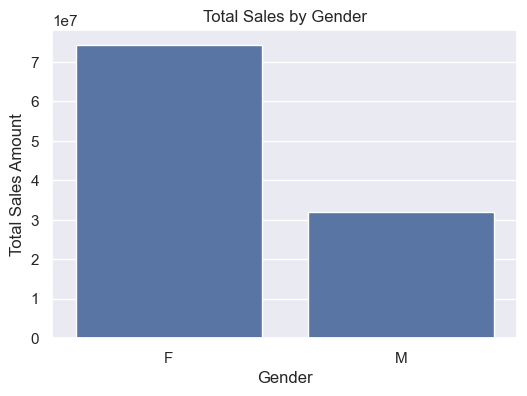

In [10]:
plt.figure(figsize=(6,4))
sns.barplot(x='Gender', y='Amount', data=gender_sales)
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales Amount')
plt.show()


**Insight:**  
Female customers contribute significantly more to total Diwali sales compared to male customers, indicating stronger purchasing behavior during the festive season.


## Age Group-wise Sales Analysis


In [11]:
age_group_sales = df.groupby('Age Group')['Amount'].sum().reset_index()
age_group_sales


,Age Group,Amount
0,0-17,2699653
1,18-25,17240732
2,26-35,42613442
3,36-45,22144994
4,46-50,9207844
5,51-55,8261477
6,55+,4080987


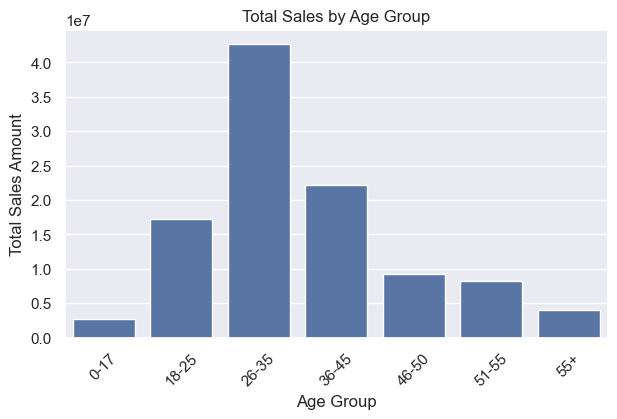

In [12]:
plt.figure(figsize=(7,4))
sns.barplot(x='Age Group', y='Amount', data=age_group_sales)
plt.title('Total Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()


**Insight:**  
The age group 26–35 contributes the highest sales during Diwali, indicating strong purchasing power and high festive engagement among young adults.


## State-wise Sales Analysis


In [13]:
state_sales = (
    df.groupby('State')['Amount']
    .sum()
    .reset_index()
    .sort_values(by='Amount', ascending=False)
)

state_sales.head(10)


,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


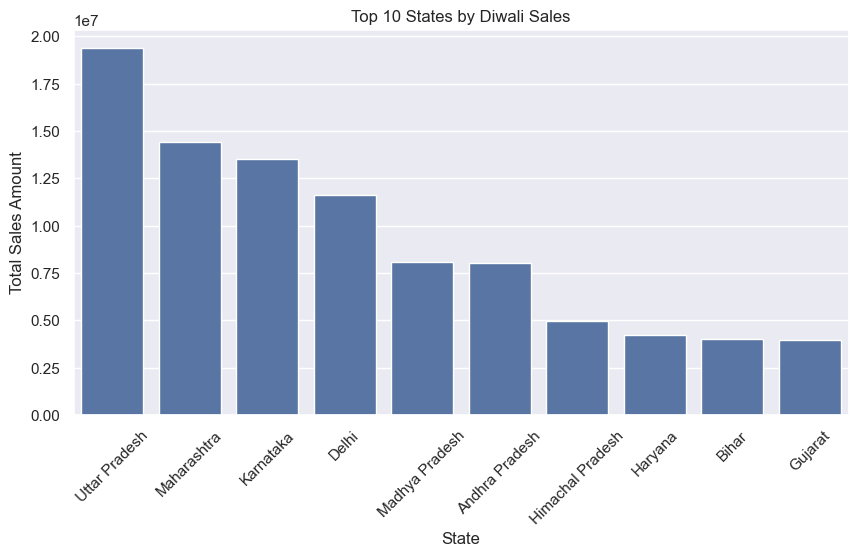

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x='State', y='Amount', data=state_sales.head(10))
plt.title('Top 10 States by Diwali Sales')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()


**Insight:**  
States such as Uttar Pradesh, Maharashtra, and Karnataka generate the highest Diwali sales, making them key regions for targeted festive marketing campaigns.


## Zone-wise Sales Analysis


In [15]:
zone_sales = df.groupby('Zone')['Amount'].sum().reset_index()
zone_sales


,Zone,Amount
0,Central,41600872
1,Eastern,7049213
2,Northern,12618752
3,Southern,26606667
4,Western,18373625


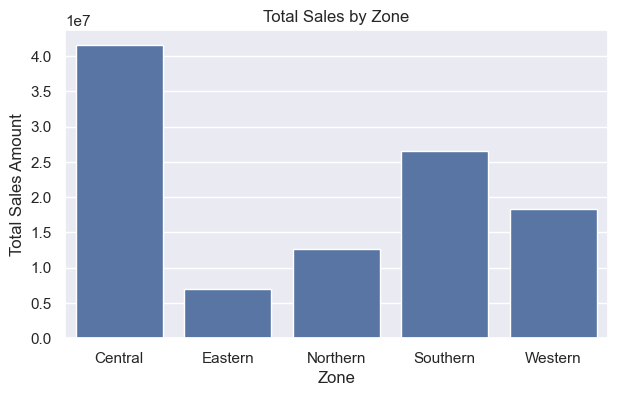

In [16]:
plt.figure(figsize=(7,4))
sns.barplot(x='Zone', y='Amount', data=zone_sales)
plt.title('Total Sales by Zone')
plt.xlabel('Zone')
plt.ylabel('Total Sales Amount')
plt.show()


**Insight:**  
The Western and Southern zones contribute the highest Diwali sales, indicating strong market presence and higher consumer spending in these regions.


## Occupation-wise Sales Analysis


In [17]:
occupation_sales = (
    df.groupby('Occupation')['Amount']
    .sum()
    .reset_index()
    .sort_values(by='Amount', ascending=False)
)

occupation_sales.head(10)


,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


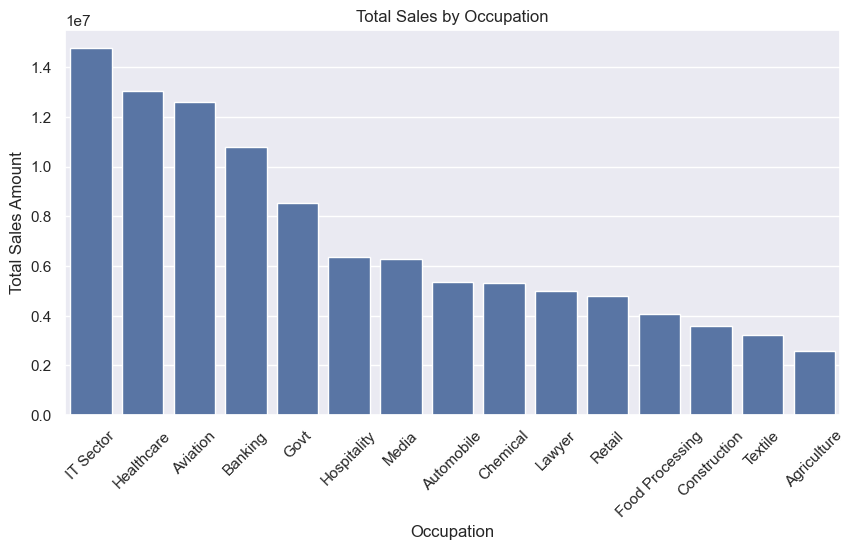

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation', y='Amount', data=occupation_sales)
plt.title('Total Sales by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()


**Insight:**  
Customers from IT, Healthcare, and Aviation professions contribute the highest Diwali sales, indicating higher disposable income and festive spending among these occupations.


## Product Category-wise Sales Analysis


In [19]:
product_sales = (
    df.groupby('Product_Category')['Amount']
    .sum()
    .reset_index()
    .sort_values(by='Amount', ascending=False)
)

product_sales.head(10)


,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


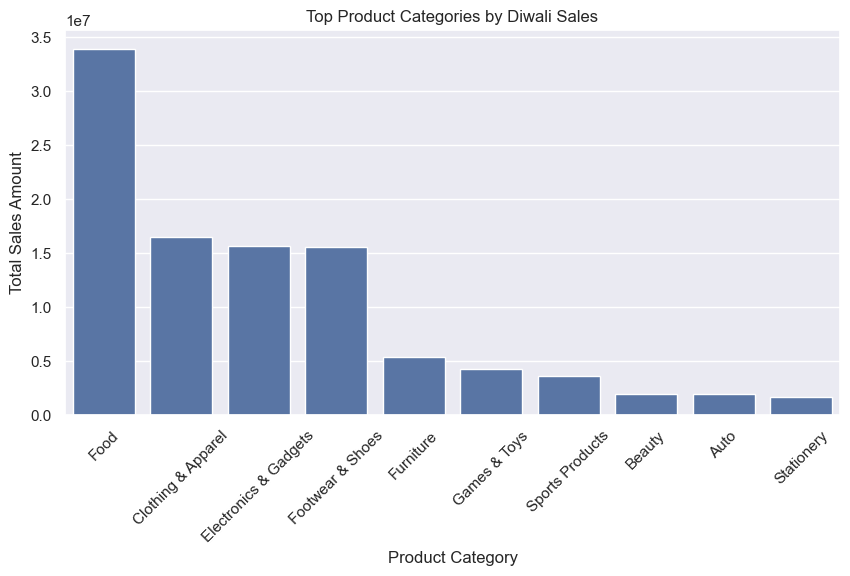

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x='Product_Category', y='Amount', data=product_sales.head(10))
plt.title('Top Product Categories by Diwali Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()


**Insight:**  
Food, Clothing, and Electronics emerge as the top-selling product categories during Diwali, highlighting consumer preference for essentials, gifts, and festive purchases.


## Key Business Insights & Recommendations


### Key Findings:
- Female customers dominate festive spending during Diwali.
- The age group 26–35 shows the highest purchasing power.
- Western and Southern zones generate maximum revenue.
- IT, Healthcare, and Aviation professionals are high-value customers.
- Food, Clothing, and Electronics are the most profitable product categories.

### Business Recommendations:
- Design targeted marketing campaigns for women aged 26–35.
- Focus promotional budgets on Western and Southern regions.
- Introduce premium festive offers for IT and Healthcare professionals.
- Increase inventory and discounts for top-performing product categories during Diwali.


## Conclusion

This project successfully analyzed Diwali sales data to uncover customer behavior patterns across demographics, regions, occupations, and product categories. The insights derived from this analysis can help businesses optimize festive marketing strategies, improve customer targeting, and maximize revenue during peak sales seasons.
